<a href="https://colab.research.google.com/github/fioreenza/StatProb/blob/main/Student%20Mental%20Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kelompok 10 - Kelas A
Mata Kuliah : Statistika dan Probabilitas

- Riskiyatul Nur Oktarani / 5027231013
- Fiorenza Adelia Nalle / 5027231053
- Raditya Hardian Santoso / 5027231033

# Exploratory Data Analysis

# Dataset
Menggunakan dataset asli open-source yang tersedia pada kaggle, dengan deskripsi :

- Nama Dataset : Student Mental Health Dataset

- Link Dataset : https://www.kaggle.com/datasets/shariful07/student-mental-health

- Deskripsi : Dataset ini berisikan kumpulan data yang menjadi faktor kesehatan mental mahasiswa.



# Tujuan

Analisis ini bertujuan untuk mengidentifikasi variabel mana yang paling berpengaruh terhadap kesehatan mental yang dialami oleh mahasiswa dengan memanfaatkan dataset yang ada.

# Memuat Data

In [168]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# load dataset
mentalhealth_df = pd.read_csv("Student Mental health.csv")


In [169]:
# menampilkan dataset
mentalhealth_df

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [170]:
# hanya menampilkan 5 sampel data teratas
mentalhealth_df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [171]:
# list nama atribut
mentalhealth_df.columns.values.tolist()

['Timestamp',
 'Choose your gender',
 'Age',
 'What is your course?',
 'Your current year of Study',
 'What is your CGPA?',
 'Marital status',
 'Do you have Depression?',
 'Do you have Anxiety?',
 'Do you have Panic attack?',
 'Did you seek any specialist for a treatment?']

In [172]:
# identifikasi tipe data setiap atribut
mentalhealth_df.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [173]:
# cek apakah ada nilai kosong
mentalhealth_df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [174]:
# terdapat satu nilai kosong, hilangkan data yang mengandung nilai kosong
mentalhealth_df = mentalhealth_df.dropna()

In [175]:
# hapus data timestamp
mentalhealth_df = mentalhealth_df.drop('Timestamp', axis=1)

In [176]:
# cek kembali untuk nilai kosong
mentalhealth_df.isnull().sum()

Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [177]:
# memberi nama atribut dengan nama yang lebih mudah
mentalhealth_df.rename(columns={
                            'Choose your gender' : 'Gender',
                            'What is your course?' : 'Course',
                            'Your current year of Study' : 'Year of Study',
                            'What is your CGPA?' : 'CGPA',
                            'Marital status' : 'Marital Status',
                            'Do you have Depression?' : 'Depression',
                            'Do you have Anxiety?' : 'Anxiety',
                            'Do you have Panic attack?'  : 'Panic Attack',
                            'Did you seek any specialist for a treatment?' : 'Visited Specialist'}, inplace=True)
mentalhealth_df.head()

,Gender,Age,Course,Year of Study,CGPA,Marital Status,Depression,Anxiety,Panic Attack,Visited Specialist
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


# Identifikasi Atribut

### 1. Gender

Atribut "gender" berisi data dengan tipe data object. Berikut merupakan nilai yang dimiliki oleh atribut ini.

In [178]:
# cek semua nilai yang berbeda dalam kolom "gender"
mentalhealth_df['Gender'].unique().tolist()

['Female', 'Male']

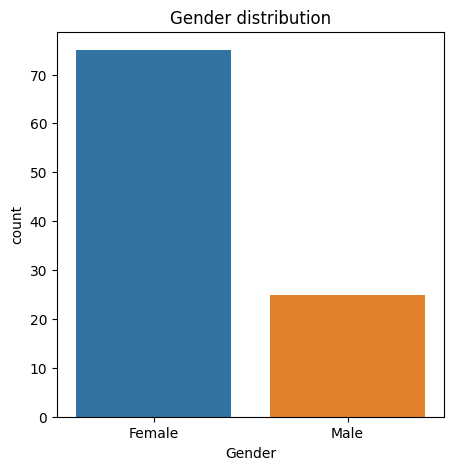

In [179]:
plt.figure(figsize=(5,5))
sns.countplot(data=mentalhealth_df, x='Gender')
plt.title("Gender distribution")
plt.show()

Responden kebanyakan adalah wanita.

###2. Age

Atribut "gender" berisi data dengan tipe data float. Berikut merupakan nilai yang dimiliki oleh atribut ini.

In [180]:
# cek semua nilai yang berbeda dalam kolom "age"
mentalhealth_df['Age'].unique().tolist()

[18.0, 21.0, 19.0, 22.0, 23.0, 20.0, 24.0]

In [181]:
# ubah tipe data age yang awalnya float menjadi int
mentalhealth_df['Age'] = mentalhealth_df['Age'].astype(int)
mentalhealth_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 100
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              100 non-null    object
 1   Age                 100 non-null    int64 
 2   Course              100 non-null    object
 3   Year of Study       100 non-null    object
 4   CGPA                100 non-null    object
 5   Marital Status      100 non-null    object
 6   Depression          100 non-null    object
 7   Anxiety             100 non-null    object
 8   Panic Attack        100 non-null    object
 9   Visited Specialist  100 non-null    object
dtypes: int64(1), object(9)
memory usage: 8.6+ KB


In [182]:
# cek kembali nilai yang berbeda dalam kolom "age"
mentalhealth_df['Age'].unique().tolist()

[18, 21, 19, 22, 23, 20, 24]

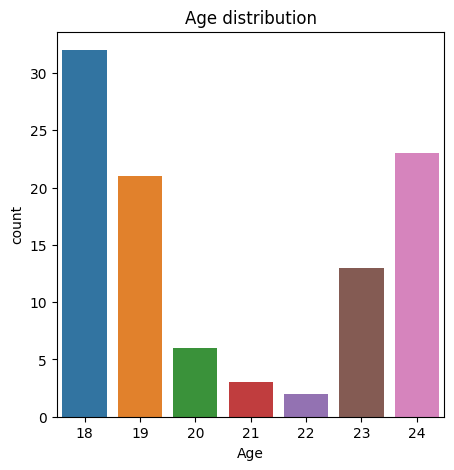

In [183]:
plt.figure(figsize=(5,5))
sns.countplot(data=mentalhealth_df, x='Age')
plt.title("Age distribution")
plt.show()

Responden kebanyakan berumur 18 tahun.

###3. Course

Atribut "course" berisi data dengan tipe data object. Berikut merupakan nilai yang dimiliki oleh atribut ini.

In [184]:
# cek semua nilai yang berbeda dalam kolom "course"
mentalhealth_df['Course'].unique().tolist()

['Engineering',
 'Islamic education',
 'BIT',
 'Laws',
 'Mathemathics',
 'Pendidikan islam',
 'BCS',
 'Human Resources',
 'Irkhs',
 'Psychology',
 'KENMS',
 'Accounting ',
 'ENM',
 'Marine science',
 'KOE',
 'Banking Studies',
 'Business Administration',
 'Law',
 'KIRKHS',
 'Usuluddin ',
 'TAASL',
 'Engine',
 'ALA',
 'Biomedical science',
 'koe',
 'Kirkhs',
 'BENL',
 'Benl',
 'IT',
 'CTS',
 'engin',
 'Econs',
 'MHSC',
 'Malcom',
 'Kop',
 'Human Sciences ',
 'Biotechnology',
 'Communication ',
 'Diploma Nursing',
 'Pendidikan Islam ',
 'Radiography',
 'psychology',
 'Fiqh fatwa ',
 'DIPLOMA TESL',
 'Koe',
 'Fiqh',
 'Islamic Education',
 'Nursing ',
 'Pendidikan Islam']

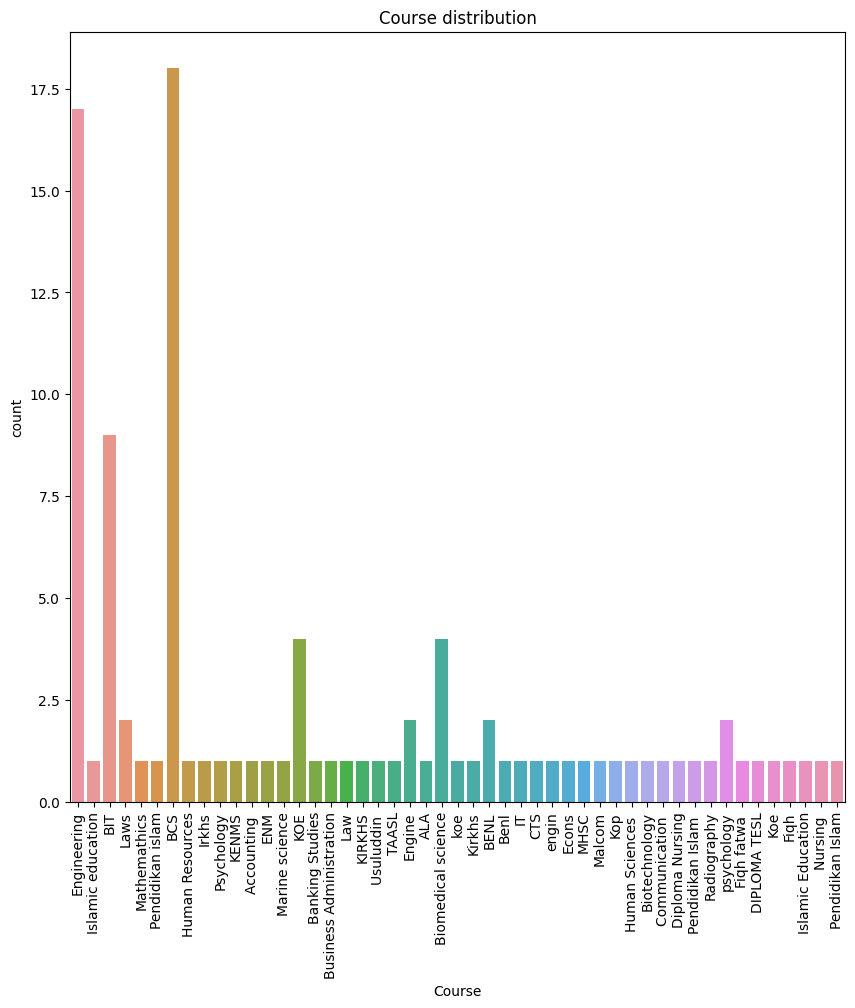

In [185]:
plt.figure(figsize=(10,10))
sns.countplot(data=mentalhealth_df, x='Course')
plt.title("Course distribution")
plt.xticks(rotation=90)
plt.show()

Responden kebanyakan berasal dari jurusan BCS (Bachelor of Computer Science).

###4. Year of Study

Atribut "year of study" berisi data dengan tipe data object. Berikut merupakan nilai yang dimiliki oleh atribut ini.

In [186]:
# cek semua nilai yang berbeda dalam kolom "course"
mentalhealth_df['Year of Study'].unique().tolist()

['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2', 'Year 3']

In [187]:
# mengganti nilai tertentu
mentalhealth_df.replace({'year 1' : 'Year 1',
                    'year 2' : 'Year 2',
                    'year 3' : 'Year 3',
                    'year 4' : 'Year 4'}, inplace=True)
mentalhealth_df['Year of Study'].unique()

array(['Year 1', 'Year 2', 'Year 3', 'Year 4'], dtype=object)

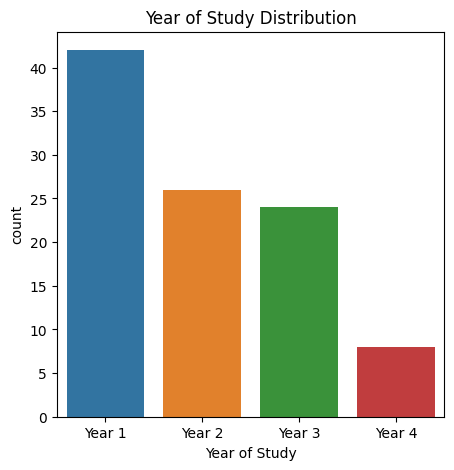

In [188]:
plt.figure(figsize=(5,5))
sns.countplot(data=mentalhealth_df, x='Year of Study')
plt.title("Year of Study Distribution")
plt.show()

Responden kebanyakan berada di tahun pertama kuliah.

###5. CGPA

Atribut "CGPA" berisi data dengan tipe data object. Berikut merupakan nilai yang dimiliki oleh atribut ini.

In [189]:
# cek semua nilai yang berbeda dalam kolom "CGPA"
mentalhealth_df['CGPA'].unique().tolist()

['3.00 - 3.49',
 '3.50 - 4.00',
 '3.50 - 4.00 ',
 '2.50 - 2.99',
 '2.00 - 2.49',
 '0 - 1.99']

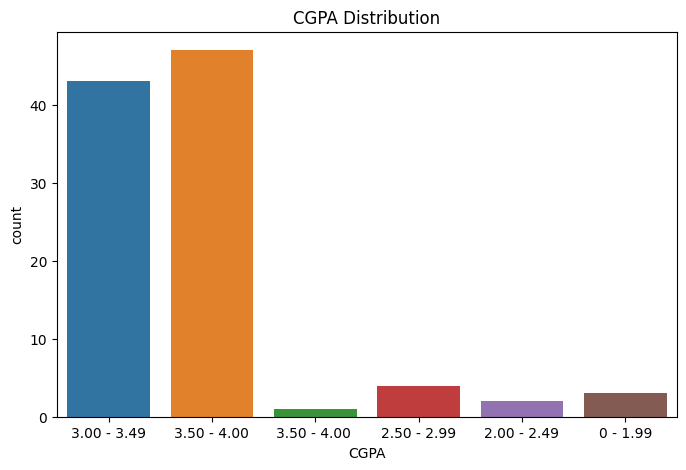

In [190]:
plt.figure(figsize=(8,5))
sns.countplot(data=mentalhealth_df, x='CGPA')
plt.title("CGPA Distribution")
plt.show()

Responden kebanyakan memiliki CGPA 3.00-3.49.

###6. Marital Status

Atribut "marital status" berisi data dengan tipe data object. Berikut merupakan nilai yang dimiliki oleh atribut ini.

In [191]:
# cek semua nilai yang berbeda dalam kolom "marital status"
mentalhealth_df['Marital Status'].unique().tolist()

['No', 'Yes']

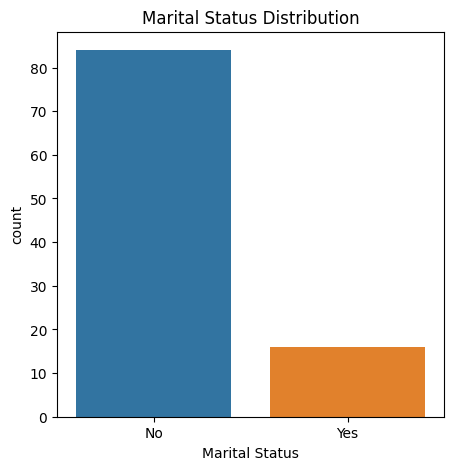

In [192]:
plt.figure(figsize=(5,5))
sns.countplot(data=mentalhealth_df, x='Marital Status')
plt.title("Marital Status Distribution")
plt.show()

Responden kebanyakan belum menikah.

###7.Depression

Atribut "depression" berisi data dengan tipe data object. Berikut merupakan nilai yang dimiliki oleh atribut ini.

In [193]:
# cek semua nilai yang berbeda dalam kolom "depression"
mentalhealth_df['Depression'].unique().tolist()

['Yes', 'No']

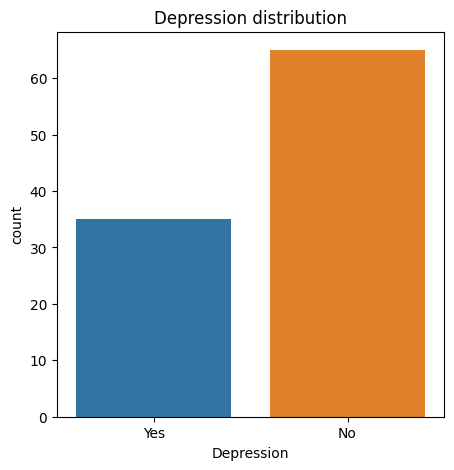

In [194]:
plt.figure(figsize=(5,5))
sns.countplot(data=mentalhealth_df, x='Depression')
plt.title("Depression distribution")
plt.show()

Responden kebanyakan tidak mengalami depresi.

###8.Anxiety

Atribut "anxiety" berisi data dengan tipe data object. Berikut merupakan nilai yang dimiliki oleh atribut ini.

In [195]:
# cek semua nilai yang berbeda dalam kolom "anxiety"
mentalhealth_df['Anxiety'].unique().tolist()

['No', 'Yes']

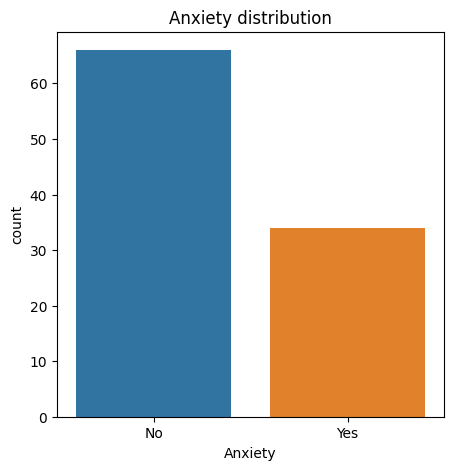

In [196]:
plt.figure(figsize=(5,5))
sns.countplot(data=mentalhealth_df, x='Anxiety')
plt.title("Anxiety distribution")
plt.show()

Responden kebanyakan tidak mengalami anxiety.

###9.Panic Attack

Atribut "panic attack" berisi data dengan tipe data object. Berikut merupakan nilai yang dimiliki oleh atribut ini.

In [197]:
# cek semua nilai yang berbeda dalam kolom "panic attack"
mentalhealth_df['Panic Attack'].unique().tolist()

['Yes', 'No']

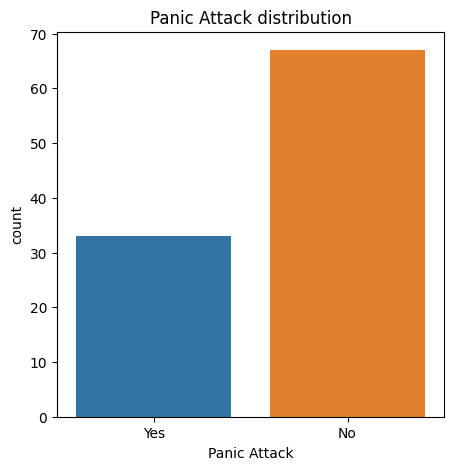

In [198]:
plt.figure(figsize=(5,5))
sns.countplot(data=mentalhealth_df, x='Panic Attack')
plt.title("Panic Attack distribution")
plt.show()

Responden kebanyakan tidak mengalami panic attack.

###10. Visited Specialist

Atribut "visited specialist" berisi data dengan tipe data object. Berikut merupakan nilai yang dimiliki oleh atribut ini.

In [199]:
# cek semua nilai yang berbeda dalam kolom "visited specialist"
mentalhealth_df['Visited Specialist'].unique().tolist()

['No', 'Yes']

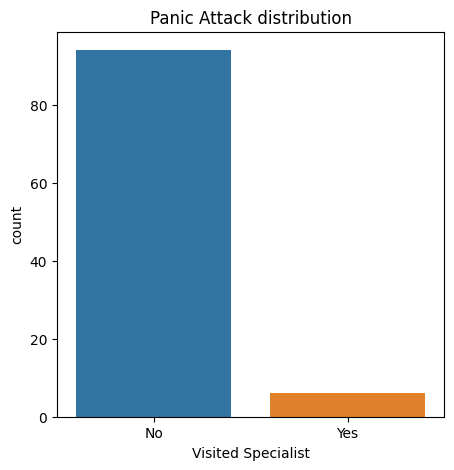

In [200]:
plt.figure(figsize=(5,5))
sns.countplot(data=mentalhealth_df, x='Visited Specialist')
plt.title("Panic Attack distribution")
plt.show()

Responden kebanyakan tidak mengunjungi spesialis kesehatan mental.

#Analisis

Berikut adalah analisis tingkat depresi, anxiety, dan panic attack berdasarkan gender, jurusan, umur, tahun studi, GPA, dan marital status.

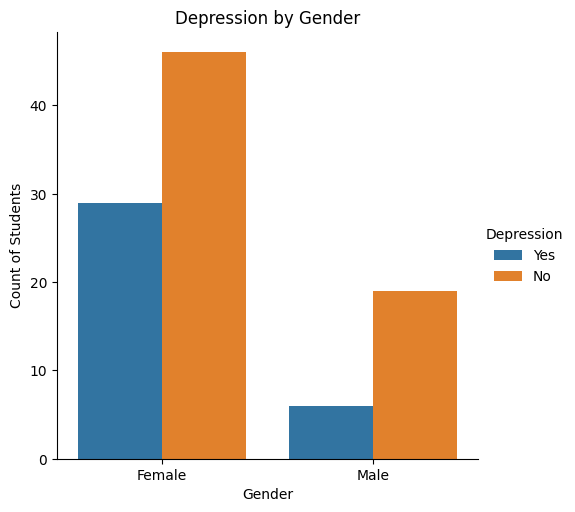

In [202]:
sns.catplot(data=mentalhealth_df, x="Gender", hue='Depression', kind="count")\
    .set(title="Depression by Gender", \
        xlabel='Gender',\
        ylabel='Count of Students')

In [247]:
counts = mentalhealth_df.groupby(['Gender', 'Depression']).size().reset_index(name='Count')

# This will give you a DataFrame with the count of students for each combination of 'Gender' and 'Depression'.
print(counts)

   Gender Depression  Count
0  Female         No     46
1  Female        Yes     29
2    Male         No     19
3    Male        Yes      6


Grafik batang yang ditampilkan menggambarkan distribusi depresi berdasarkan gender. Berikut ini analisisnya:

- Wanita: Terdapat 46 wanita yang tidak mengalami depresi (warna oranye) dan 29 wanita yang mengalami depresi (warna biru).
- Laki-laki: Terdapat 19 laki-laki yang tidak mengalami kecemasan dan 6 laki-laki yang mengalami kecemasan.

Dari data ini, bisa diinterpretasikan bahwa jumlah wanita yang mengalami depresi lebih tinggi dibandingkan laki-laki. Selain itu, jumlah total wanita yang tidak mengalami depresi juga lebih tinggi daripada laki-laki. Secara keseluruhan, grafik menunjukkan bahwa wanita cenderung mengalami depresi daripada laki-laki

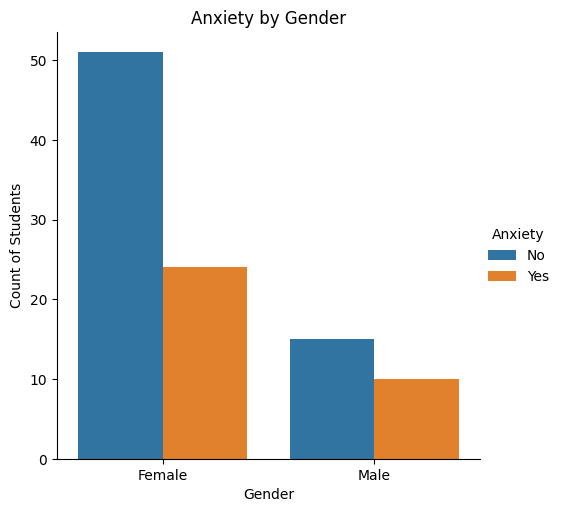

In [203]:
sns.catplot(data=mentalhealth_df, x="Gender", hue='Anxiety', kind="count")\
    .set(title="Anxiety by Gender", \
        xlabel='Gender',\
        ylabel='Count of Students')

In [246]:
counts = mentalhealth_df.groupby(['Gender', 'Anxiety']).size().reset_index(name='Count')

# This will give you a DataFrame with the count of students for each combination of 'Gender' and 'Anxiety'.
print(counts)

   Gender Anxiety  Count
0  Female      No     51
1  Female     Yes     24
2    Male      No     15
3    Male     Yes     10


Grafik batang yang ditampilkan menggambarkan distribusi anxiety berdasarkan gender. Berikut ini analisisnya:

- Wanita: Terdapat 51 wanita yang tidak mengalami anxiety (warna biru) dan 24 wanita yang mengalami anxiety (warna oranye).
- Laki-laki: Terdapat 15 laki-laki yang tidak mengalami anxiety (warna biru) dan 10 laki-laki yang mengalami anxiety (warna oranye).

Dari data ini, bisa diinterpretasikan bahwa jumlah wanita yang mengalami anxiety lebih tinggi dibandingkan laki-laki. Selain itu, jumlah total wanita yang tidak mengalami anxiety juga lebih tinggi daripada laki-laki. Secara keseluruhan, grafik menunjukkan bahwa wanita cenderung mengalami anxiety daripada laki-laki

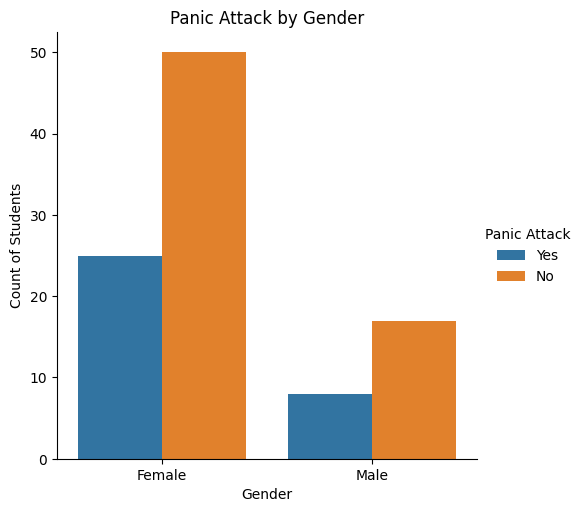

In [204]:
sns.catplot(data=mentalhealth_df, x="Gender", hue='Panic Attack', kind="count")\
    .set(title="Panic Attack by Gender", \
        xlabel='Gender',\
        ylabel='Count of Students')

In [248]:
counts = mentalhealth_df.groupby(['Gender', 'Panic Attack']).size().reset_index(name='Count')

# This will give you a DataFrame with the count of students for each combination of 'Gender' and 'Panic Attack'.
print(counts)

   Gender Panic Attack  Count
0  Female           No     50
1  Female          Yes     25
2    Male           No     17
3    Male          Yes      8


Grafik batang yang ditampilkan menggambarkan distribusi panic attack berdasarkan gender. Berikut ini analisisnya:

- Wanita: Terdapat 50 wanita yang tidak mengalami panic attack (warna biru) dan 25 wanita yang mengalami panic attack (warna oranye).
- Laki-laki: Terdapat 17 laki-laki yang tidak mengalami panic attack (warna biru) dan 8 laki-laki yang mengalami panic attack (warna oranye).

Dari data ini, bisa diinterpretasikan bahwa jumlah wanita yang mengalami panic attack lebih tinggi dibandingkan laki-laki. Selain itu, jumlah total wanita yang tidak mengalami panic attack juga lebih tinggi daripada laki-laki. Secara keseluruhan, grafik menunjukkan bahwa wanita cenderung mengalami panic attack daripada laki-laki

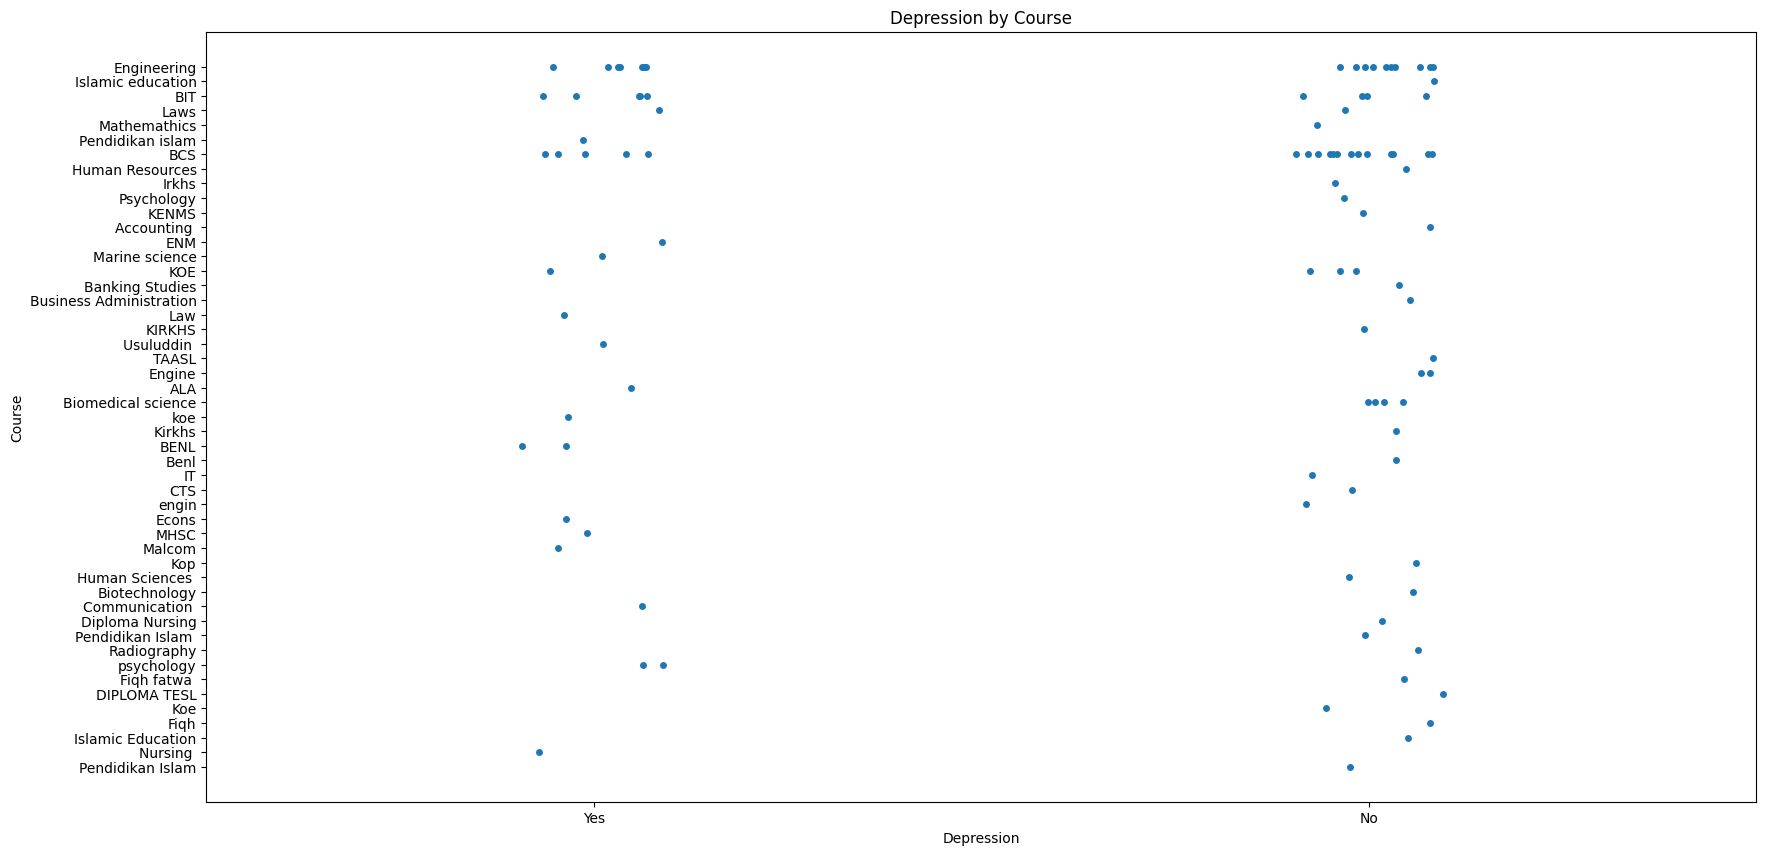

In [205]:
plt.figure(figsize=(20, 10))
sns.stripplot(data=mentalhealth_df, x='Depression', y='Course')\
    .set(title="Depression by Course")
plt.show()


Grafik ini menunjukkan distribusi mahasiswa yang mengalami depresi berdasarkan jurusan, maka dapat diambil kesimpulan bahwa
**jurusan engineering mengalami tingkat depresi tertinggi**

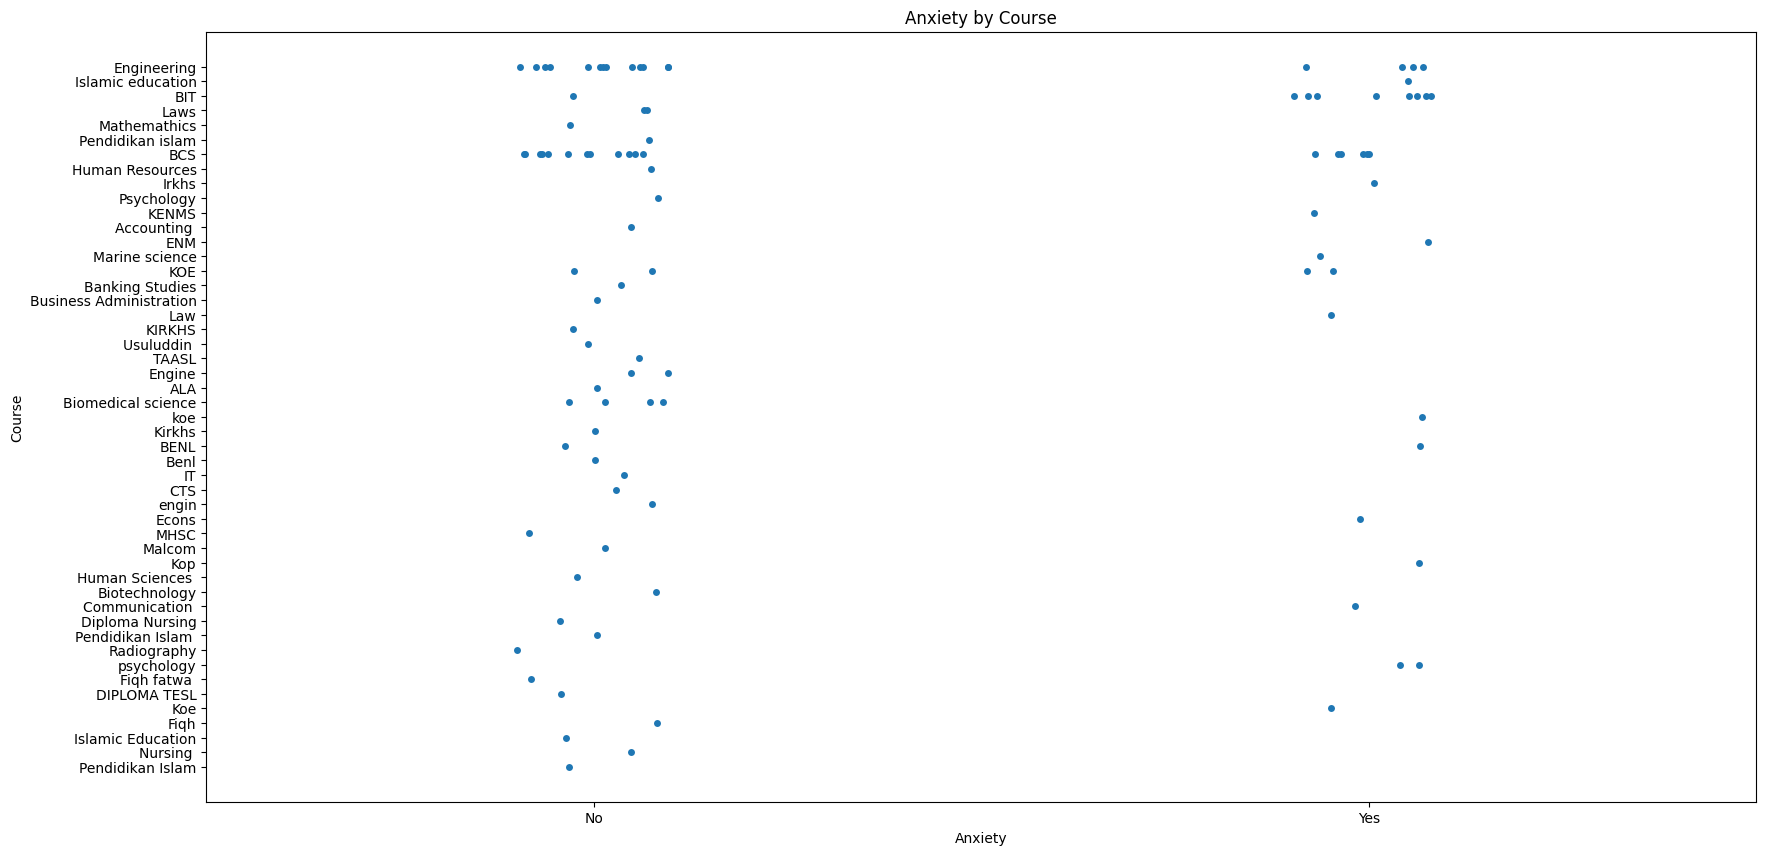

In [206]:
plt.figure(figsize=(20, 10))
sns.stripplot(data=mentalhealth_df, x='Anxiety', y='Course')\
    .set(title="Anxiety by Course")
plt.show()


Grafik ini menunjukkan distribusi mahasiswa yang mengalami anxiety berdasarkan jurusan, maka dapat diambil kesimpulan bahwa
**jurusan engineering dan BCS mengalami tingkat anxiety tertinggi**

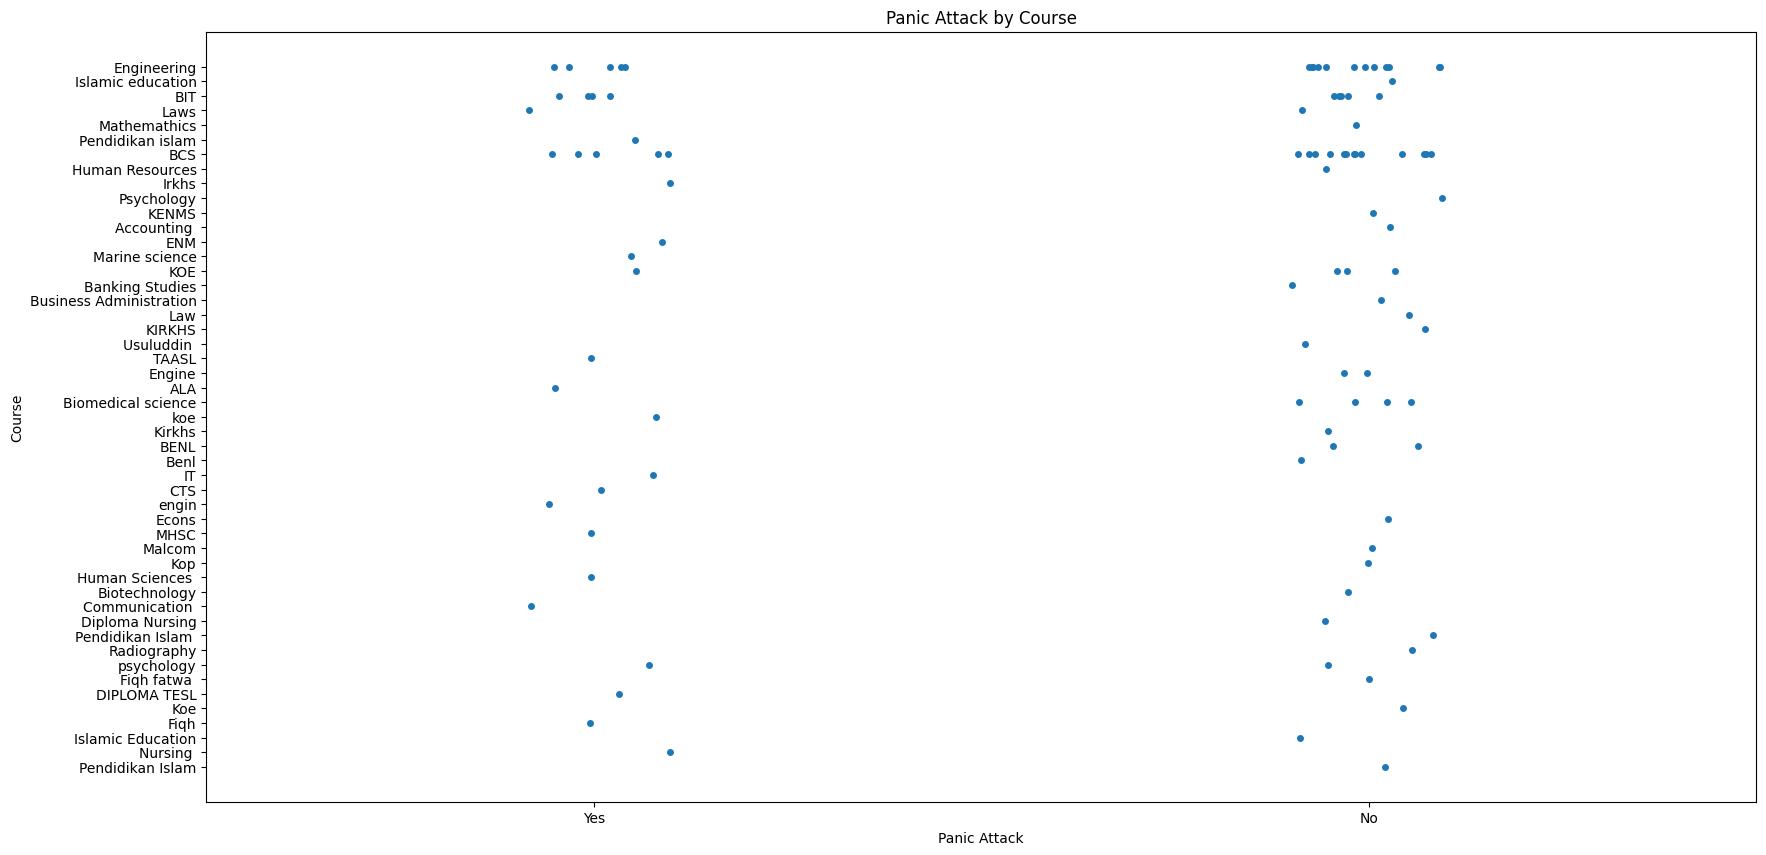

In [207]:
plt.figure(figsize=(20, 10))
sns.stripplot(data=mentalhealth_df, x='Panic Attack', y='Course')\
    .set(title="Panic Attack by Course")
plt.show()


Grafik ini menunjukkan distribusi mahasiswa yang mengalami panic attack berdasarkan jurusan, maka dapat diambil kesimpulan bahwa
**jurusan engineering, BCS, dan BIT mengalami tingkat panic attack tertinggi**

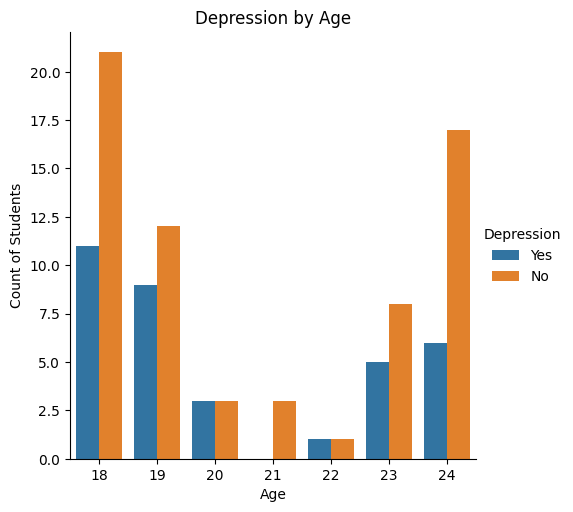

In [208]:
sns.catplot(data=mentalhealth_df, x="Age", hue='Depression', kind="count")\
    .set(title="Depression by Age", \
        xlabel='Age',\
        ylabel='Count of Students')

In [250]:
counts = mentalhealth_df.groupby(['Age', 'Depression']).size().reset_index(name='Count')

# This will give you a DataFrame with the count of students for each combination of 'Age' and 'Depression'.
print(counts)

    Age Depression  Count
0    18         No     21
1    18        Yes     11
2    19         No     12
3    19        Yes      9
4    20         No      3
5    20        Yes      3
6    21         No      3
7    22         No      1
8    22        Yes      1
9    23         No      8
10   23        Yes      5
11   24         No     17
12   24        Yes      6



Grafik ini menunjukkan distribusi mahasiswa yang mengalami depresi berdasarkan umur.

- Umur 18: terdapat 11 mahasiswa yang mengalami depresi dan 21 mahasiswa yang tidak mengalami depresi
- Umur 19: terdapat 9 mahasiswa yang mengalami depresi dan 12 mahasiswa yang tidak mengalami depresi
- Umur 20: terdapat 3 mahasiswa yang mengalami depresi dan 3 mahasiswa yang tidak mengalami depresi
- Umur 21: terdapat 3 mahasiswa yang tidak mengalami depresi
- Umur 22: terdapat 1 mahasiswa yang mengalami depresi dan 1 mahasiswa yang tidak mengalami depresi
- Umur 23: terdapat 5 mahasiswa yang mengalami depresi dan 8 mahasiswa yang tidak mengalami depresi
- Umur 24: terdapat 6 mahasiswa yang mengalami depresi dan 17 mahasiswa yang tidak mengalami depresi

Maka dapat diambil kesimpulan bahwa
**mahasiswa dengan umur 18 mengalami tingkat depresi tertinggi**







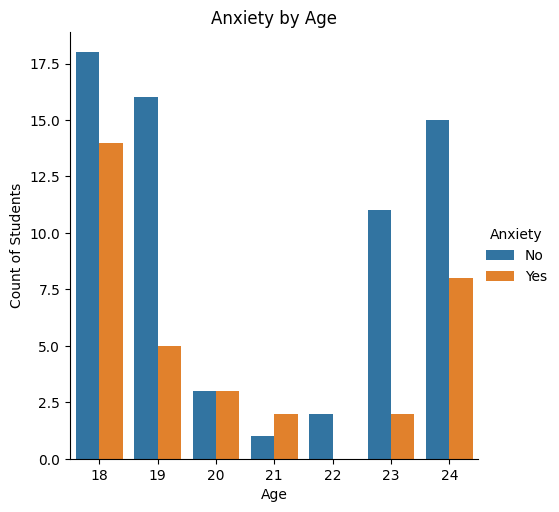

In [209]:
sns.catplot(data=mentalhealth_df, x="Age", hue='Anxiety', kind="count")\
    .set(title="Anxiety by Age", \
        xlabel='Age',\
        ylabel='Count of Students')

In [251]:
counts = mentalhealth_df.groupby(['Age', 'Anxiety']).size().reset_index(name='Count')

# This will give you a DataFrame with the count of students for each combination of 'Age' and 'Anxiety'.
print(counts)

    Age Anxiety  Count
0    18      No     18
1    18     Yes     14
2    19      No     16
3    19     Yes      5
4    20      No      3
5    20     Yes      3
6    21      No      1
7    21     Yes      2
8    22      No      2
9    23      No     11
10   23     Yes      2
11   24      No     15
12   24     Yes      8



Grafik ini menunjukkan distribusi mahasiswa yang mengalami anxiety berdasarkan umur.

- Umur 18: terdapat 14 mahasiswa yang mengalami anxiety dan 18 mahasiswa yang tidak mengalami anxiety
- Umur 19: terdapat 5 mahasiswa yang mengalami anxiety dan 16 mahasiswa yang tidak mengalami anxiety
- Umur 20: terdapat 3 mahasiswa yang mengalami anxiety dan 3 mahasiswa yang tidak mengalami anxiety
- Umur 21: terdapat 2 mahasiswa yang mengalami anxiety dan 1 mahasiswa yang tidak mengalami anxiety
- Umur 22: terdapat 2 mahasiswa yang tidak mengalami anxiety
- Umur 23: terdapat 2 mahasiswa yang mengalami anxiety dan 11 mahasiswa yang tidak mengalami anxiety
- Umur 24: terdapat 8 mahasiswa yang mengalami anxiety dan 15 mahasiswa yang tidak mengalami anxiety

Maka dapat diambil kesimpulan bahwa
**mahasiswa dengan umur 18 mengalami tingkat anxiety tertinggi**

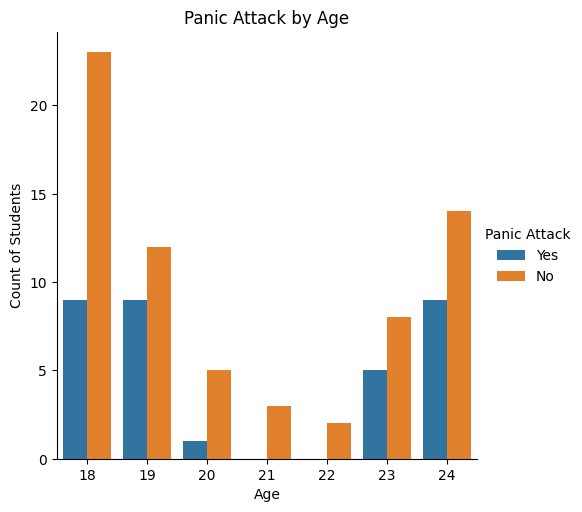

In [210]:
sns.catplot(data=mentalhealth_df, x="Age", hue='Panic Attack', kind="count")\
    .set(title="Panic Attack by Age", \
        xlabel='Age',\
        ylabel='Count of Students')

In [252]:
counts = mentalhealth_df.groupby(['Age', 'Panic Attack']).size().reset_index(name='Count')

# This will give you a DataFrame with the count of students for each combination of 'Age' and 'Panic Attack'.
print(counts)

    Age Panic Attack  Count
0    18           No     23
1    18          Yes      9
2    19           No     12
3    19          Yes      9
4    20           No      5
5    20          Yes      1
6    21           No      3
7    22           No      2
8    23           No      8
9    23          Yes      5
10   24           No     14
11   24          Yes      9



Grafik ini menunjukkan distribusi mahasiswa yang mengalami panic attack berdasarkan umur.

- Umur 18: terdapat 9 mahasiswa yang mengalami panic attack dan 23 mahasiswa yang tidak mengalami panic attack
- Umur 19: terdapat 9 mahasiswa yang mengalami panic attack dan 12 mahasiswa yang tidak mengalami panic attack
- Umur 20: terdapat 1 mahasiswa yang mengalami panic attack dan 5 mahasiswa yang tidak mengalami panic attack
- Umur 21: terdapat 3 mahasiswa yang tidak mengalami panic attack
- Umur 22: terdapat 2 mahasiswa yang tidak mengalami panic attack
- Umur 23: terdapat 5 mahasiswa yang mengalami panic attack dan 8 mahasiswa yang tidak mengalami panic attack
- Umur 24: terdapat 9 mahasiswa yang mengalami panic attack dan 14 mahasiswa yang tidak mengalami panic attack

Maka dapat diambil kesimpulan bahwa
**mahasiswa dengan umur 18 mengalami tingkat panic attack tertinggi**

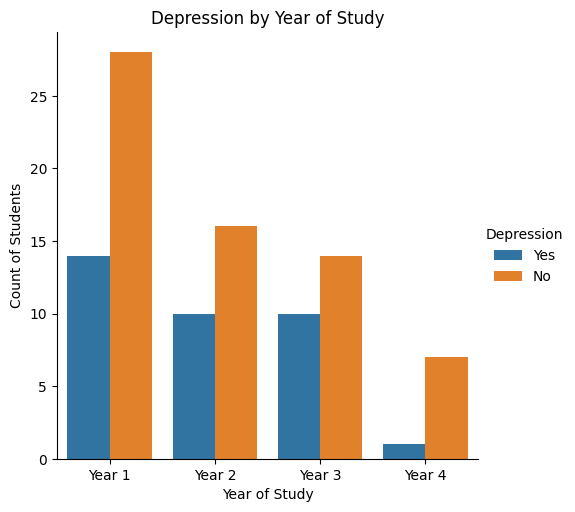

In [211]:
sns.catplot(data=mentalhealth_df, x="Year of Study", hue='Depression', kind="count")\
    .set(title="Depression by Year of Study", \
        xlabel='Year of Study',\
        ylabel='Count of Students')

In [257]:
counts = mentalhealth_df.groupby(['Year of Study', 'Depression']).size().reset_index(name='Count')

# This will give you a DataFrame with the count of students for each combination of 'Year of Study' and 'Depression'.
print(counts)

  Year of Study Depression  Count
0        Year 1         No     28
1        Year 1        Yes     14
2        Year 2         No     16
3        Year 2        Yes     10
4        Year 3         No     14
5        Year 3        Yes     10
6        Year 4         No      7
7        Year 4        Yes      1


Grafik ini menunjukkan distribusi mahasiswa yang mengalami depresi berdasarkan tahun studi.

- Tahun 1: terdapat 14 mahasiswa yang mengalami depresi dan 28 mahasiswa yang tidak mengalami depresi
- Tahun 2: terdapat 10 mahasiswa yang mengalami depresi dan 16 mahasiswa yang tidak mengalami depresi
- Tahun 3: terdapat 10 mahasiswa yang mengalami depresi dan 14 mahasiswa yang tidak mengalami depresi
- Tahun 4: terdapat 1 mahasiswa yang  mengalami depresi dan 7 mahasiswa yang tidak mengalami depresi

Maka dapat diambil kesimpulan bahwa **mahasiswa di tahun pertama mengalami tingkat depresi tertinggi**

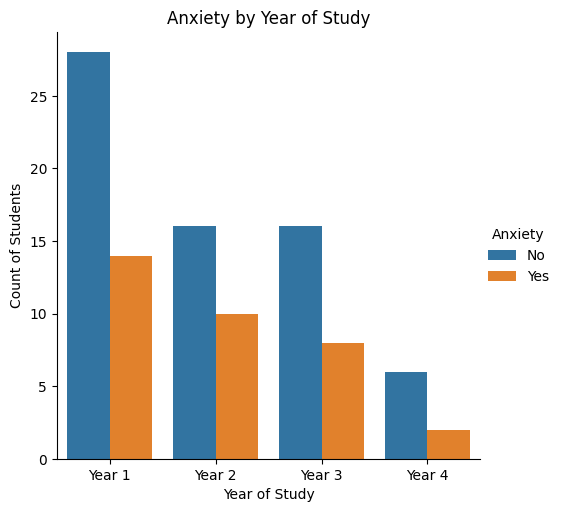

In [212]:
sns.catplot(data=mentalhealth_df, x="Year of Study", hue='Anxiety', kind="count")\
    .set(title="Anxiety by Year of Study", \
        xlabel='Year of Study',\
        ylabel='Count of Students')

In [258]:
counts = mentalhealth_df.groupby(['Year of Study', 'Anxiety']).size().reset_index(name='Count')

# This will give you a DataFrame with the count of students for each combination of 'Year of Study' and 'Anxiety'.
print(counts)

  Year of Study Anxiety  Count
0        Year 1      No     28
1        Year 1     Yes     14
2        Year 2      No     16
3        Year 2     Yes     10
4        Year 3      No     16
5        Year 3     Yes      8
6        Year 4      No      6
7        Year 4     Yes      2


Grafik ini menunjukkan distribusi mahasiswa yang mengalami anxiety berdasarkan tahun studi.

- Tahun 1: terdapat 14 mahasiswa yang mengalami anxiety dan 28 mahasiswa yang tidak mengalami anxiety
- Tahun 2: terdapat 10 mahasiswa yang mengalami anxiety dan 16 mahasiswa yang tidak mengalami anxiety
- Tahun 3: terdapat 8 mahasiswa yang mengalami anxiety dan 16 mahasiswa yang tidak mengalami anxiety
- Tahun 4: terdapat 2 mahasiswa yang mengalami anxiety dan 6 mahasiswa yang tidak mengalami anxiety

Maka dapat diambil kesimpulan bahwa **mahasiswa di tahun pertama mengalami tingkat anxiety tertinggi**

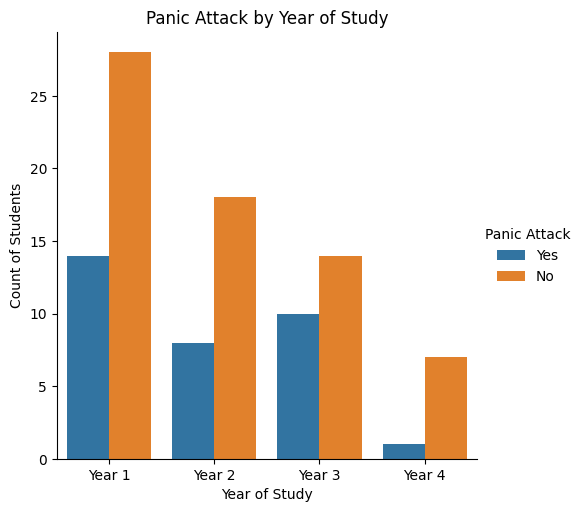

In [213]:
sns.catplot(data=mentalhealth_df, x="Year of Study", hue='Panic Attack', kind="count")\
    .set(title="Panic Attack by Year of Study", \
        xlabel='Year of Study',\
        ylabel='Count of Students')

In [260]:
counts = mentalhealth_df.groupby(['Year of Study', 'Panic Attack']).size().reset_index(name='Count')

# This will give you a DataFrame with the count of students for each combination of 'Year of Study' and 'Panic Attack'.
print(counts)

  Year of Study Panic Attack  Count
0        Year 1           No     28
1        Year 1          Yes     14
2        Year 2           No     18
3        Year 2          Yes      8
4        Year 3           No     14
5        Year 3          Yes     10
6        Year 4           No      7
7        Year 4          Yes      1


Grafik ini menunjukkan distribusi mahasiswa yang mengalami panic attack berdasarkan tahun studi.

- Tahun 1: terdapat 14 mahasiswa yang mengalami panic attack dan 28 mahasiswa yang tidak mengalami panic attack
- Tahun 2: terdapat 8 mahasiswa yang mengalami panic attack dan 18 mahasiswa yang tidak mengalami panic attack
- Tahun 3: terdapat 10 mahasiswa yang mengalami panic attack dan 14 mahasiswa yang tidak mengalami panic attack
- Tahun 4: terdapat 1 mahasiswa yang mengalami panic attack dan 7 mahasiswa yang tidak mengalami panic attack

Maka dapat diambil kesimpulan bahwa **mahasiswa di tahun pertama mengalami tingkat panic attack tertinggi**

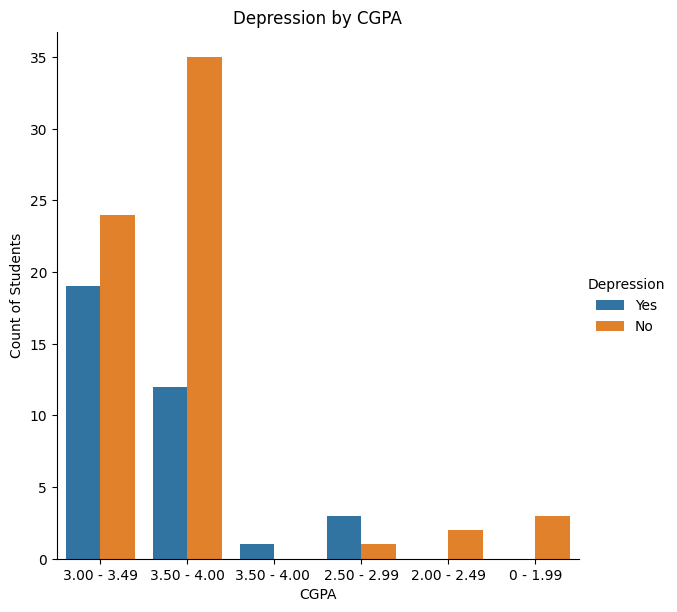

In [214]:
sns.catplot(data=mentalhealth_df, x="CGPA", hue='Depression', kind="count", height=6, aspect=1) \
    .set(title="Depression by CGPA", xlabel='CGPA', ylabel='Count of Students')

plt.show()

In [261]:
counts = mentalhealth_df.groupby(['CGPA', 'Depression']).size().reset_index(name='Count')

# This will give you a DataFrame with the count of students for each combination of 'CGPA' and 'Depression'.
print(counts)

           CGPA Depression  Count
0      0 - 1.99         No      3
1   2.00 - 2.49         No      2
2   2.50 - 2.99         No      1
3   2.50 - 2.99        Yes      3
4   3.00 - 3.49         No     24
5   3.00 - 3.49        Yes     19
6   3.50 - 4.00         No     35
7   3.50 - 4.00        Yes     12
8  3.50 - 4.00         Yes      1


Grafik ini menunjukkan distribusi mahasiswa yang mengalami anxiety berdasarkan GPA, maka dapat diambil kesimpulan bahwa
**mahasiswa dengan rentang GPA 3.50-4.00 mengalami tingkat anxiety tertinggi**

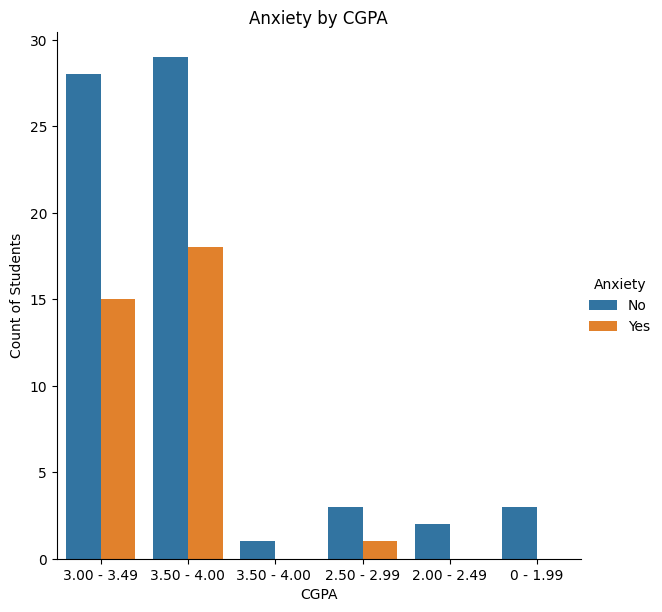

In [215]:
sns.catplot(data=mentalhealth_df, x="CGPA", hue='Anxiety', kind="count", height=6, aspect=1)\
    .set(title="Anxiety by CGPA", \
        xlabel='CGPA',\
        ylabel='Count of Students')

In [265]:
counts = mentalhealth_df.groupby(['CGPA', 'Anxiety']).size().reset_index(name='Count')

# This will give you a DataFrame with the count of students for each combination of 'CGPA' and 'Anxiety'.
print(counts)

           CGPA Anxiety  Count
0      0 - 1.99      No      3
1   2.00 - 2.49      No      2
2   2.50 - 2.99      No      3
3   2.50 - 2.99     Yes      1
4   3.00 - 3.49      No     28
5   3.00 - 3.49     Yes     15
6   3.50 - 4.00      No     29
7   3.50 - 4.00     Yes     18
8  3.50 - 4.00       No      1


Grafik ini menunjukkan distribusi mahasiswa yang mengalami anxiety berdasarkan GPA, maka dapat diambil kesimpulan bahwa
**mahasiswa dengan rentang GPA 3.50-4.00 mengalami tingkat anxiety tertinggi**

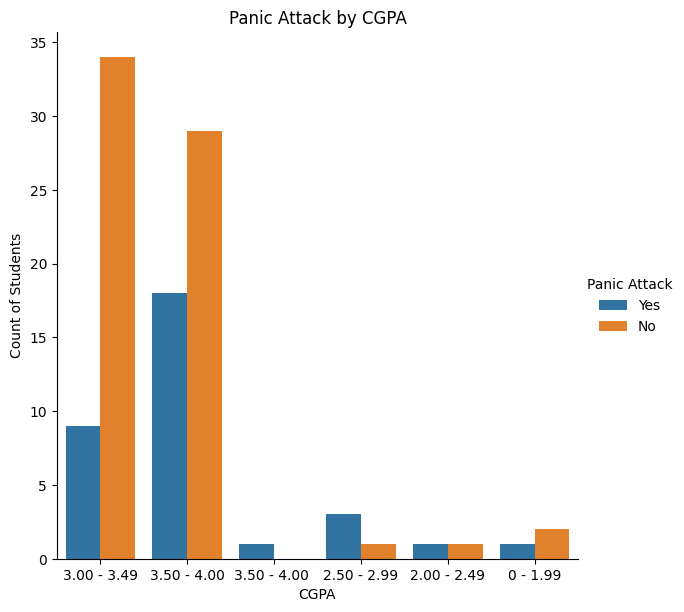

In [233]:
sns.catplot(data=mentalhealth_df, x="CGPA", hue='Panic Attack', kind="count", height=6, aspect=1)\
    .set(title="Panic Attack by CGPA", \
        xlabel='CGPA',\
        ylabel='Count of Students')

In [266]:
counts = mentalhealth_df.groupby(['CGPA', 'Panic Attack']).size().reset_index(name='Count')

# This will give you a DataFrame with the count of students for each combination of 'CGPA' and 'Panic Attack'.
print(counts)

            CGPA Panic Attack  Count
0       0 - 1.99           No      2
1       0 - 1.99          Yes      1
2    2.00 - 2.49           No      1
3    2.00 - 2.49          Yes      1
4    2.50 - 2.99           No      1
5    2.50 - 2.99          Yes      3
6    3.00 - 3.49           No     34
7    3.00 - 3.49          Yes      9
8    3.50 - 4.00           No     29
9    3.50 - 4.00          Yes     18
10  3.50 - 4.00           Yes      1


Grafik ini menunjukkan distribusi mahasiswa yang mengalami panic attack berdasarkan GPA, maka dapat diambil kesimpulan bahwa
**mahasiswa dengan rentang GPA 3.00-3.49 mengalami tingkat panic attack tertinggi**

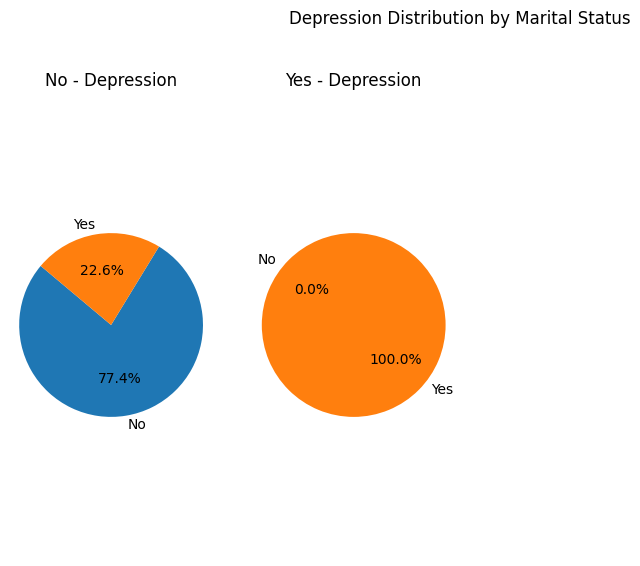

In [243]:
depression_counts = mentalhealth_df.groupby(['Marital Status', 'Depression']).size().unstack()

# Fill NaN values with 0 before conversion
depression_counts = depression_counts.fillna(0).astype(int)

plt.figure(figsize=(12, 6))
for i, marital_status in enumerate(depression_counts.index):
    plt.subplot(1, 4, i + 1)
    plt.pie(depression_counts.loc[marital_status], labels=depression_counts.columns, autopct='%1.1f%%', startangle=140)
    plt.title(f"{marital_status} - Depression")
    plt.axis('equal')

plt.suptitle("Depression Distribution by Marital Status", y=1.02)
plt.show()

In [268]:
counts = mentalhealth_df.groupby(['Marital Status', 'Depression']).size().reset_index(name='Count')

# This will give you a DataFrame with the count of students for each combination of 'Marital Status' and 'Depression'.
print(counts)

  Marital Status Depression  Count
0             No         No     65
1             No        Yes     19
2            Yes        Yes     16


Grafik tersebut menunjukkan distribusi depresi berdasarkan status pernikahan.

1.   Diagram pertama menunjukkan bahwa 22.6% dari yang belum menikah mengalami depresi, sementara 77.4% tidak mengalami depresi.
2.   Diagram kedua, yang sepenuhnya oranye, menunjukkan bahwa 100% dari responden yang sudah menikah mengalami depresi



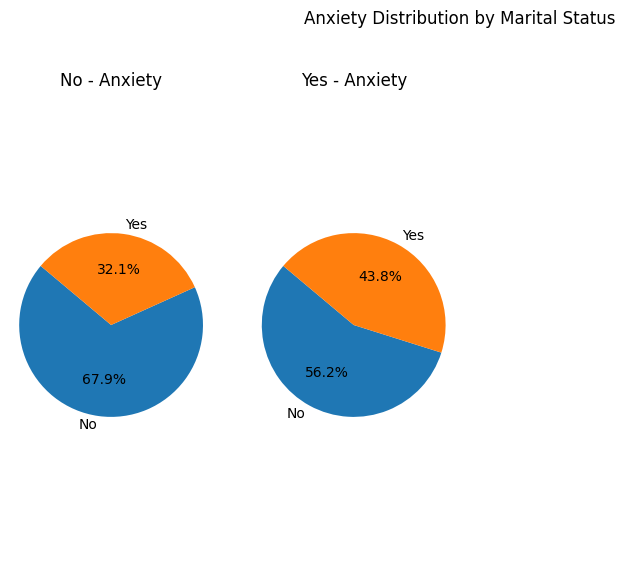

In [271]:
anxiety_counts = mentalhealth_df.groupby(['Marital Status', 'Anxiety']).size().unstack()

plt.figure(figsize=(12, 6))
for i, marital_status in enumerate(anxiety_counts.index):
    plt.subplot(1, 4, i + 1)
    plt.pie(anxiety_counts.loc[marital_status], labels=panic_attack_counts.columns, autopct='%1.1f%%', startangle=140)
    plt.title(f"{marital_status} - Anxiety")
    plt.axis('equal')

plt.suptitle("Anxiety Distribution by Marital Status", y=1.02)
plt.show()

In [269]:
counts = mentalhealth_df.groupby(['Marital Status', 'Anxiety']).size().reset_index(name='Count')

# This will give you a DataFrame with the count of students for each combination of 'Marital Status' and 'Anxiety'.
print(counts)

  Marital Status Anxiety  Count
0             No      No     57
1             No     Yes     27
2            Yes      No      9
3            Yes     Yes      7


Grafik tersebut menunjukkan distribusi anxiety berdasarkan status pernikahan.  

1.   Diagram pertama menunjukkan bahwa 32.1% dari yang belum menikah mengalami anxiety, sementara 67.9% tidak mengalami anxiety.
2.   Diagram kedua menunjukkan bahwa 43.8% dari yang sudah menikah mengalami anxiety, sementara 56.2% tidak mengalami anxiety.

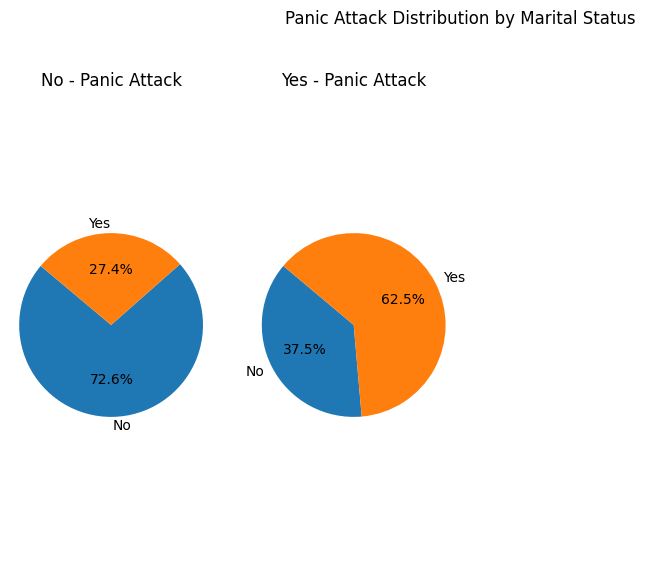

In [245]:
panic_attack_counts = mentalhealth_df.groupby(['Marital Status', 'Panic Attack']).size().unstack()

plt.figure(figsize=(12, 6))
for i, marital_status in enumerate(panic_attack_counts.index):
    plt.subplot(1, 4, i + 1)
    plt.pie(panic_attack_counts.loc[marital_status], labels=panic_attack_counts.columns, autopct='%1.1f%%', startangle=140)
    plt.title(f"{marital_status} - Panic Attack")
    plt.axis('equal')

plt.suptitle("Panic Attack Distribution by Marital Status", y=1.02)
plt.show()

In [272]:
counts = mentalhealth_df.groupby(['Marital Status', 'Panic Attack']).size().reset_index(name='Count')

# This will give you a DataFrame with the count of students for each combination of 'Marital Status' and 'Panic Attack'.
print(counts)

  Marital Status Panic Attack  Count
0             No           No     61
1             No          Yes     23
2            Yes           No      6
3            Yes          Yes     10


Grafik tersebut menunjukkan distribusi panic attack berdasarkan status pernikahan.

1.   Diagram pertama menunjukkan bahwa 27.4% dari yang belum menikah mengalami panic attack, sementara 72.6% tidak mengalami panic attack.
2.   Diagram kedua menunjukkan bahwa 62.5% dari yang sudah menikah mengalami panic attack, sementara 37.5% tidak mengalami panic attack.



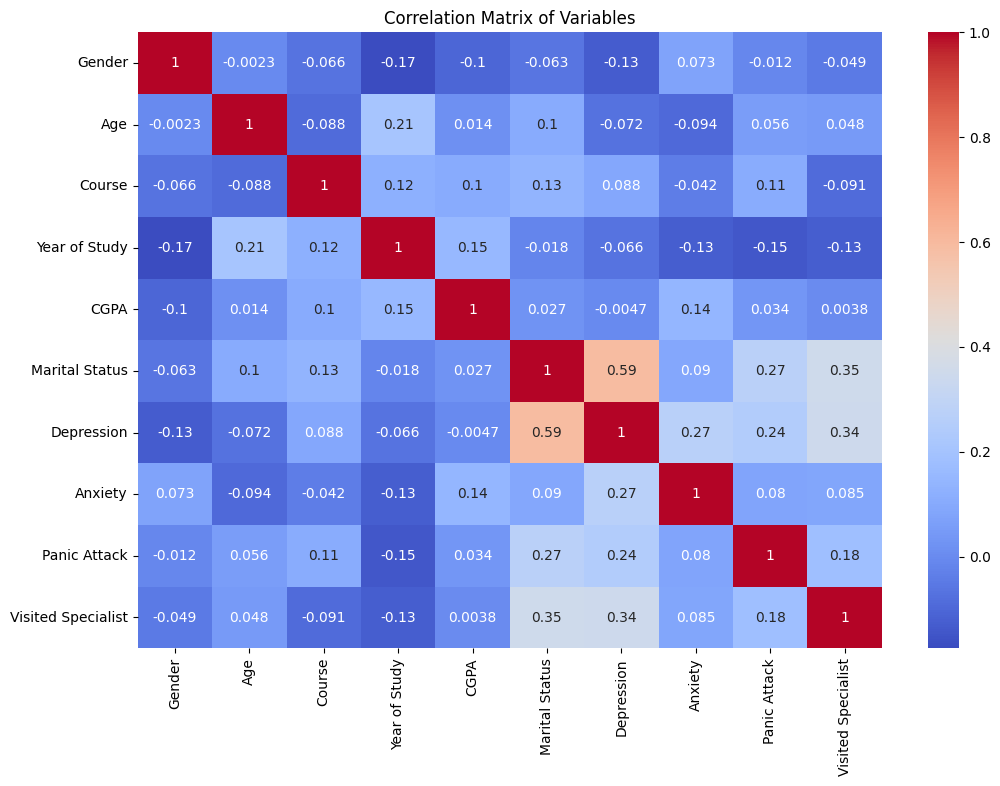

In [161]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_columns= [x for x in mentalhealth_df.columns if mentalhealth_df.dtypes[x] == 'object']
for column in categorical_columns:
    mentalhealth_df[column] = encoder.fit_transform(mentalhealth_df[column])
mentalhealth_df.head()

corr_matrix = mentalhealth_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Variables")
plt.show()

Dari heatmap tersebut, dapat ditarik kesimpulan bahwa variabel yang paling berpengaruh adalah variabel dengan warna biru lebih cerah menuju merah dan memiliki nilai yang lebih besar dari variabel lain :
1. Variabel yang paling berpengaruh terhadap depresi adalah marital status dengan skor korelasi sebesar 0.59. Hal ini menunjukkan bahwa terdapat hubungan erat antara status pernikahan dengan tingkat depresi mahasiswa. Mahasiswa dengan status pernikahan tertentu mungkin lebih rentan mengalami depresi.
2. Depresi saling berhubungan atau berkolerasi dengan anxiety karena memiliki skor korelasi 0.27. Hal ini menunjukkan bahwa mahasiswa yang mengalami depresi cenderung juga mengalami tingkat anxiety yang lebih tinggi. Marital status dapat menjadi faktor yang berkontribusi terhadap kedua kondisi ini.
3. Variabel yang paling berpengaruh terhadap panic attack adalah martial status dengan skor korelasi sebesar 0.27. Hal ini menunjukkan bahwa mahasiswa dengan status pernikahan tertentu mungkin lebih rentan mengalami serangan panik dibandingkan dengan yang lain.





# Kesimpulan

Sehingga dari analisis dataset tersebut, dapat ditarik kesimpulan bahwa variable yang paling berpengaruh terhadap kesehatan mental mahasiswa adalah marital status atau status pernikahan. Oleh karena itu, perhatian khusus dan dukungan psikologis mungkin diperlukan untuk mahasiswa dengan status pernikahan tertentu guna menjaga kesehatan mental mereka. Penting untuk mempertimbangkan faktor ini dalam merancang program-program kesejahteraan mental di lingkungan kampus.






